In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import Counter as c # return counts
import seaborn as sns #used for data Visualization
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #splits data in random train and test array
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error#model performance
import pickle #Python object hierarchy is converted into a byte stream,
from sklearn.linear_model import LinearRegression #Regresssion ML algorithm

In [2]:
data = pd.read_csv('data.csv')
data.shape

(5656458, 6)

The dataset has 56 Lakhs records and 6 columns



In [3]:
data.describe()

Year         Value
count  5.656458e+06  5.656458e+06
mean   1.994464e+03  1.070501e+12
std    1.387895e+01  4.842469e+13
min    1.960000e+03 -9.824821e+15
25%    1.984000e+03  5.566242e+00
50%    1.997000e+03  6.357450e+01
75%    2.006000e+03  1.346722e+07
max    2.015000e+03  1.103367e+16

In [4]:
data.dtypes

CountryName       object
CountryCode       object
IndicatorName     object
IndicatorCode     object
Year               int64
Value            float64
dtype: object

Checking for outliers

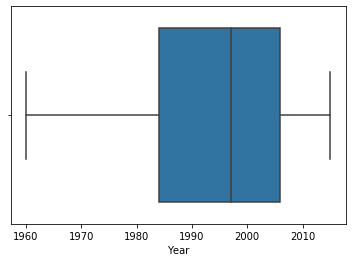

In [5]:
sns.boxplot(data['Year'])

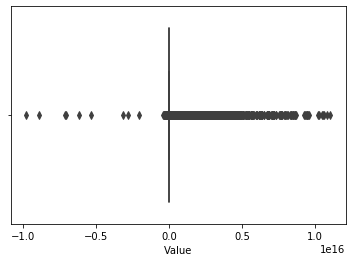

In [6]:
sns.boxplot(data['Value'])

In [7]:
data.head(10)

CountryName CountryCode                                      IndicatorName  \
0  Arab World         ARB  Adolescent fertility rate (births per 1,000 wo...   
1  Arab World         ARB  Age dependency ratio (% of working-age populat...   
2  Arab World         ARB  Age dependency ratio, old (% of working-age po...   
3  Arab World         ARB  Age dependency ratio, young (% of working-age ...   
4  Arab World         ARB        Arms exports (SIPRI trend indicator values)   
5  Arab World         ARB        Arms imports (SIPRI trend indicator values)   
6  Arab World         ARB               Birth rate, crude (per 1,000 people)   
7  Arab World         ARB                                 CO2 emissions (kt)   
8  Arab World         ARB             CO2 emissions (metric tons per capita)   
9  Arab World         ARB  CO2 emissions from gaseous fuel consumption (%...   

       IndicatorCode  Year         Value  
0        SP.ADO.TFRT  1960  1.335609e+02  
1        SP.POP.DPND  1960  8.779760e+01  
2     SP.POP.DPND.OL  1960  6.634579e+00  
3     SP.POP.DPND.YG  1960  8.102333e+01  
4     MS.MIL.XPRT.KD  1960  3.000000e+06  
5     MS.MIL.MPRT.KD  1960  5.380000e+08  
6     SP.DYN.CBRT.IN  1960  4.769789e+01  
7     EN.ATM.CO2E.KT  1960  5.956399e+04  
8     EN.ATM.CO2E.PC  1960  6.439635e-01  
9  EN.ATM.CO2E.GF.ZS  1960  5.041292e+00

In [8]:
print(round(data['Value']))

0          1.340000e+02
1          8.800000e+01
2          7.000000e+00
3          8.100000e+01
4          3.000000e+06
5          5.380000e+08
6          4.800000e+01
7          5.956400e+04
8          1.000000e+00
9          5.000000e+00
10         8.500000e+01
11         4.954200e+04
12         5.000000e+00
13         2.000000e+01
14         7.000000e+00
15         4.068330e+05
16         1.000000e+00
17         2.000000e+00
18         3.000000e+00
19         3.324685e+06
20         4.800000e+01
21         4.600000e+01
22         4.700000e+01
23         4.645919e+09
24         2.468800e+09
25         1.600000e+01
26         2.000000e+00
27         0.000000e+00
28         6.000000e+00
29         3.000000e+00
               ...     
5656428    1.626000e+06
5656429    1.663930e+08
5656430    8.377700e+07
5656431    2.321300e+07
5656432    6.250000e+05
5656433    0.000000e+00
5656434    1.000000e+03
5656435    6.250000e+05
5656436    0.000000e+00
5656437    1.000000e+03
5656438    1.670

In [9]:
data['CountryName'].value_counts()   #number of countries and their count

Mexico                       37244
Colombia                     37227
Philippines                  36912
Peru                         36815
Costa Rica                   36457
Thailand                     36355
Morocco                      36275
Indonesia                    36252
Malaysia                     35874
Turkey                       35819
Ecuador                      35788
Pakistan                     35768
India                        35721
Brazil                       35550
Egypt, Arab Rep.             35367
Bolivia                      35307
Tunisia                      35302
Honduras                     35171
Guatemala                    35078
El Salvador                  34739
Kenya                        34621
Algeria                      34578
Cameroon                     34259
Dominican Republic           34253
Jordan                       34050
Senegal                      33990
Panama                       33984
Nicaragua                    33638
Bangladesh          

In [10]:
countries = data['CountryName'].unique().tolist()
len(countries)

247

In [11]:
# How many unique country codes are there ? (should be the same #)
countryCodes = data['CountryCode'].unique().tolist()
len(countryCodes)

247

In [12]:
# How many unique indicators are there ? (should be the same #)
indicators = data['IndicatorName'].unique().tolist()
len(indicators)

1344

In [13]:
data['IndicatorName'].value_counts()

Population, total                                                                                                    13484
Population growth (annual %)                                                                                         13442
Urban population (% of total)                                                                                        13415
Rural population (% of total population)                                                                             13415
Rural population                                                                                                     13374
Urban population                                                                                                     13374
Urban population growth (annual %)                                                                                   13337
Surface area (sq. km)                                                                                                13090
Land area (sq. k

In [14]:
# How many years of data do we have ?
years = data['Year'].unique().tolist()
len(years)

56

In [15]:
print(min(years)," to ",max(years))

1960  to  2015


In [16]:
# select CO2 emissions for the United States
hist_indicator = 'CO2 emissions \(metric'
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)

# stage is just those indicators matching the USA for country code and CO2 emissions over time.
stage = data[mask1 & mask2]


In [17]:
stage.head()

CountryName CountryCode                           IndicatorName  \
22232   United States         USA  CO2 emissions (metric tons per capita)   
48708   United States         USA  CO2 emissions (metric tons per capita)   
77087   United States         USA  CO2 emissions (metric tons per capita)   
105704  United States         USA  CO2 emissions (metric tons per capita)   
134742  United States         USA  CO2 emissions (metric tons per capita)   

         IndicatorCode  Year      Value  
22232   EN.ATM.CO2E.PC  1960  15.999779  
48708   EN.ATM.CO2E.PC  1961  15.681256  
77087   EN.ATM.CO2E.PC  1962  16.013937  
105704  EN.ATM.CO2E.PC  1963  16.482762  
134742  EN.ATM.CO2E.PC  1964  16.968119

In [18]:
stage.shape

(52, 6)

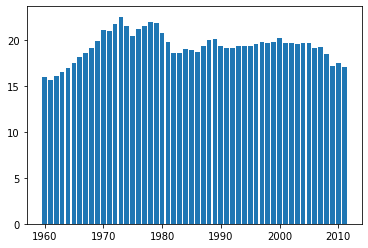

In [19]:
# get the years
years = stage['Year'].values
# get the values 

co2 = stage['Value'].values

# create
plt.bar(years,co2)
plt.show()

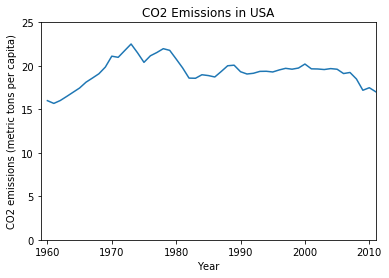

In [20]:
# switch to a line plot
plt.plot(stage['Year'].values, stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])

#label the figure
plt.title('CO2 Emissions in USA')

# to make more honest, start they y axis at 0
plt.axis([1959, 2011,0,25])
#plt.plot(stage['Year'].values, stage['Value'].values)

plt.show()

In [21]:
# If we want to just include those within one standard deviation fo the mean, we could do the following
# lower = stage['Value'].mean() - stage['Value'].std()
# upper = stage['Value'].mean() + stage['Value'].std()
# hist_data = [x for x in stage[:10000]['Value'] if x>lower and x<upper ]

# Otherwise, let's look at all the data
hist_data = stage['Value'].values

In [22]:
print(len(hist_data))

52


C:\Users\harin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


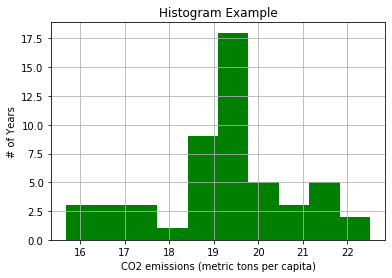

In [23]:
# the histogram of the data
plt.hist(hist_data, 10, normed=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Years')
plt.title('Histogram Example')

plt.grid(True)

plt.show()

In [24]:
# select CO2 emissions for all countries in 2011
hist_indicator = 'CO2 emissions \(metric'
hist_year = 2011

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['Year'].isin([hist_year])

# apply our mask
co2_2011 = data[mask1 & mask2]
co2_2011.head()

CountryName CountryCode  \
5026275                               Arab World         ARB   
5026788                   Caribbean small states         CSS   
5027295           Central Europe and the Baltics         CEB   
5027870  East Asia & Pacific (all income levels)         EAS   
5028456    East Asia & Pacific (developing only)         EAP   

                                  IndicatorName   IndicatorCode  Year  \
5026275  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  2011   
5026788  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  2011   
5027295  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  2011   
5027870  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  2011   
5028456  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  2011   

            Value  
5026275  4.724500  
5026788  9.692960  
5027295  6.911131  
5027870  5.859548  
5028456  5.302499

For how many countries do we have CO2 per capita emissions data in 2011

In [25]:
print(len(co2_2011))

232


C:\Users\harin\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  del sys.path[0]


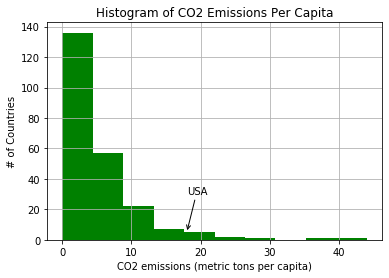

In [26]:
# let's plot a histogram of the emmissions per capita by country

# subplots returns a touple with the figure, axis attributes.
fig, ax = plt.subplots()

ax.annotate("USA",
            xy=(18, 5), xycoords='data',
            xytext=(18, 30), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.hist(co2_2011['Value'], 10, normed=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of CO2 Emissions Per Capita')

#plt.axis([10, 22, 0, 14])
plt.grid(True)

plt.show()

So the USA, at ~18 CO2 emissions (metric tons per capital) is quite high among all countries.

An interesting next step, which we'll save for you, would be to explore how this relates to other industrialized nations and to look at the outliers with those values in the 40s!

### Relationship between GDP and CO2 Emissions in USA

In [27]:
# select GDP Per capita emissions for the United States
hist_indicator = 'GDP per capita \(constant 2005'
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)

# stage is just those indicators matching the USA for country code and CO2 emissions over time.
gdp_stage = data[mask1 & mask2]

#plot gdp_stage vs stage

In [28]:
gdp_stage.head()

CountryName CountryCode                       IndicatorName  \
22282   United States         USA  GDP per capita (constant 2005 US$)   
48759   United States         USA  GDP per capita (constant 2005 US$)   
77142   United States         USA  GDP per capita (constant 2005 US$)   
105760  United States         USA  GDP per capita (constant 2005 US$)   
134798  United States         USA  GDP per capita (constant 2005 US$)   

         IndicatorCode  Year         Value  
22282   NY.GDP.PCAP.KD  1960  15482.707760  
48759   NY.GDP.PCAP.KD  1961  15578.409657  
77142   NY.GDP.PCAP.KD  1962  16276.426685  
105760  NY.GDP.PCAP.KD  1963  16749.789436  
134798  NY.GDP.PCAP.KD  1964  17476.822248

In [29]:
stage.head(2)

CountryName CountryCode                           IndicatorName  \
22232  United States         USA  CO2 emissions (metric tons per capita)   
48708  United States         USA  CO2 emissions (metric tons per capita)   

        IndicatorCode  Year      Value  
22232  EN.ATM.CO2E.PC  1960  15.999779  
48708  EN.ATM.CO2E.PC  1961  15.681256

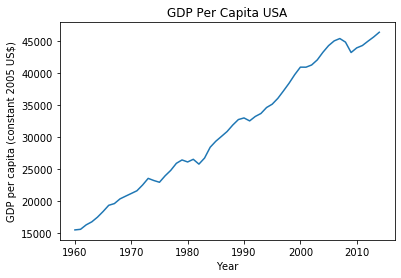

In [30]:
# switch to a line plot
plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])

#label the figure
plt.title('GDP Per Capita USA')

# to make more honest, start they y axis at 0
#plt.axis([1959, 2011,0,25])

plt.show()

So although we've seen a decline in the CO2 emissions per capita, it does not seem to translate to a decline in GDP per capita

### ScatterPlot for comparing GDP against CO2 emissions (per capita)

First, we'll need to make sure we're looking at the same time frames

In [31]:
print("GDP Min Year = ", gdp_stage['Year'].min(), "max: ", gdp_stage['Year'].max())
print("CO2 Min Year = ", stage['Year'].min(), "max: ", stage['Year'].max())

GDP Min Year =  1960 max:  2014
CO2 Min Year =  1960 max:  2011


We have 3 extra years of GDP data, so let's trim those off so the scatterplot has equal length arrays to compare (this is actually required by scatterplot)

In [32]:
gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2012]
print(len(gdp_stage_trunc))
print(len(stage))

52
52


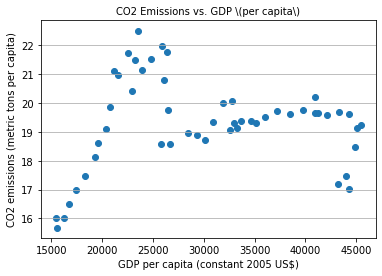

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('CO2 Emissions vs. GDP \(per capita\)',fontsize=10)
axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[10],fontsize=10)
axis.set_ylabel(stage['IndicatorName'].iloc[0],fontsize=10)

X = gdp_stage_trunc['Value']
Y = stage['Value']

axis.scatter(X, Y)
plt.show()

This doesn't look like a strong relationship.  We can test this by looking at correlation.

In [34]:
np.corrcoef(gdp_stage_trunc['Value'],stage['Value'])

array([[1.        , 0.07676005],
       [0.07676005, 1.        ]])

In [35]:
data.info() #info will give you a summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656458 entries, 0 to 5656457
Data columns (total 6 columns):
CountryName      object
CountryCode      object
IndicatorName    object
IndicatorCode    object
Year             int64
Value            float64
dtypes: float64(1), int64(1), object(4)
memory usage: 258.9+ MB


In [36]:
data.describe()  # returns important values for continous column data

Year         Value
count  5.656458e+06  5.656458e+06
mean   1.994464e+03  1.070501e+12
std    1.387895e+01  4.842469e+13
min    1.960000e+03 -9.824821e+15
25%    1.984000e+03  5.566242e+00
50%    1.997000e+03  6.357450e+01
75%    2.006000e+03  1.346722e+07
max    2.015000e+03  1.103367e+16

In [37]:
np.unique(data.dtypes,return_counts=True)

(array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object),
 array([1, 1, 4], dtype=int64))

In [38]:
cat=data.dtypes[data.dtypes=='O'].index.values
cat

array(['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode'],
      dtype=object)

In [39]:
for i in cat:
    print("Column :",i)
    print('count of classes : ',data[i].nunique())
    print(c(data[i]))
    print('*'*120)

Column : CountryName
count of classes :  247
Counter({'Mexico': 37244, 'Colombia': 37227, 'Philippines': 36912, 'Peru': 36815, 'Costa Rica': 36457, 'Thailand': 36355, 'Morocco': 36275, 'Indonesia': 36252, 'Malaysia': 35874, 'Turkey': 35819, 'Ecuador': 35788, 'Pakistan': 35768, 'India': 35721, 'Brazil': 35550, 'Egypt, Arab Rep.': 35367, 'Bolivia': 35307, 'Tunisia': 35302, 'Honduras': 35171, 'Guatemala': 35078, 'El Salvador': 34739, 'Kenya': 34621, 'Algeria': 34578, 'Cameroon': 34259, 'Dominican Republic': 34253, 'Jordan': 34050, 'Senegal': 33990, 'Panama': 33984, 'Nicaragua': 33638, 'Bangladesh': 33386, 'Sri Lanka': 33369, 'Togo': 33221, 'Iran, Islamic Rep.': 32966, 'Benin': 32965, 'Zambia': 32930, 'Madagascar': 32637, 'Burkina Faso': 32604, 'Congo, Rep.': 32310, 'Mauritius': 32285, 'Botswana': 32039, 'Jamaica': 31835, 'Rwanda': 31770, 'Ghana': 31730, 'Paraguay': 31423, 'Uganda': 31412, 'Nigeria': 31381, 'Congo, Dem. Rep.': 31257, 'Sudan': 31175, 'Latin America & Caribbean (developing o

count of classes :  1344
Counter({'Population, total': 13484, 'Population growth (annual %)': 13442, 'Rural population (% of total population)': 13415, 'Urban population (% of total)': 13415, 'Rural population': 13374, 'Urban population': 13374, 'Urban population growth (annual %)': 13337, 'Surface area (sq. km)': 13090, 'Land area (sq. km)': 13086, 'Rural population growth (annual %)': 13061, 'Population density (people per sq. km of land area)': 12988, 'Death rate, crude (per 1,000 people)': 12486, 'Adolescent fertility rate (births per 1,000 women ages 15-19)': 12485, 'Birth rate, crude (per 1,000 people)': 12485, 'Population ages 65 and above (% of total)': 12426, 'Population, ages 0-14 (% of total)': 12426, 'Population, ages 15-64 (% of total)': 12426, 'Population, female (% of total)': 12426, 'Age dependency ratio (% of working-age population)': 12423, 'Age dependency ratio, old (% of working-age population)': 12423, 'Age dependency ratio, young (% of working-age population)': 12

count of classes :  1344
Counter({'SP.POP.TOTL': 13484, 'SP.POP.GROW': 13442, 'SP.RUR.TOTL.ZS': 13415, 'SP.URB.TOTL.IN.ZS': 13415, 'SP.RUR.TOTL': 13374, 'SP.URB.TOTL': 13374, 'SP.URB.GROW': 13337, 'AG.SRF.TOTL.K2': 13090, 'AG.LND.TOTL.K2': 13086, 'SP.RUR.TOTL.ZG': 13061, 'EN.POP.DNST': 12988, 'SP.DYN.CDRT.IN': 12486, 'SP.ADO.TFRT': 12485, 'SP.DYN.CBRT.IN': 12485, 'SP.POP.65UP.TO.ZS': 12426, 'SP.POP.0014.TO.ZS': 12426, 'SP.POP.1564.TO.ZS': 12426, 'SP.POP.TOTL.FE.ZS': 12426, 'SP.POP.DPND': 12423, 'SP.POP.DPND.OL': 12423, 'SP.POP.DPND.YG': 12423, 'SP.DYN.LE00.FE.IN': 12304, 'SP.DYN.LE00.MA.IN': 12304, 'SP.DYN.LE00.IN': 12304, 'SP.DYN.TFRT.IN': 12266, 'SP.DYN.TO65.FE.ZS': 12258, 'SP.DYN.TO65.MA.ZS': 12258, 'SP.DYN.AMRT.FE': 11939, 'SP.DYN.AMRT.MA': 11939, 'AG.LND.AGRI.K2': 11751, 'AG.PRD.FOOD.XD': 11669, 'AG.LND.AGRI.ZS': 11645, 'AG.PRD.LVSK.XD': 11626, 'AG.LND.ARBL.ZS': 11568, 'AG.PRD.CROP.XD': 11563, 'AG.LND.ARBL.HA.PC': 11545, 'TX.VAL.MRCH.CD.WT': 11248, 'SP.DYN.IMRT.IN': 11201, 'SH.DYN

In [40]:
data.dtypes[data.dtypes!='O'].index.values

array(['Year', 'Value'], dtype=object)

In [41]:
data.isnull().any()#it will return true if any columns is having null values

CountryName      False
CountryCode      False
IndicatorName    False
IndicatorCode    False
Year             False
Value            False
dtype: bool

In [42]:
data.isnull().sum() #used for finding the null values

CountryName      0
CountryCode      0
IndicatorName    0
IndicatorCode    0
Year             0
Value            0
dtype: int64

In [43]:
data=data[data['CountryCode'].str.contains("USA|SGP|IND|ARB|BRB")]

In [44]:
data.head()

CountryName CountryCode                                      IndicatorName  \
0  Arab World         ARB  Adolescent fertility rate (births per 1,000 wo...   
1  Arab World         ARB  Age dependency ratio (% of working-age populat...   
2  Arab World         ARB  Age dependency ratio, old (% of working-age po...   
3  Arab World         ARB  Age dependency ratio, young (% of working-age ...   
4  Arab World         ARB        Arms exports (SIPRI trend indicator values)   

    IndicatorCode  Year         Value  
0     SP.ADO.TFRT  1960  1.335609e+02  
1     SP.POP.DPND  1960  8.779760e+01  
2  SP.POP.DPND.OL  1960  6.634579e+00  
3  SP.POP.DPND.YG  1960  8.102333e+01  
4  MS.MIL.XPRT.KD  1960  3.000000e+06

In [45]:
data1=data.copy()
from sklearn.preprocessing import LabelEncoder #imorting the LabelEncoding from sklearn
x='*'
for i in cat:#looping through all the categorical columns
    print("LABEL ENCODING OF:",i)
    LE = LabelEncoder()#creating an object of LabelEncoder
    print(c(data[i])) #getting the classes values before transformation
    data[i] = LE.fit_transform(data[i]) # trannsforming our text classes to numerical values
    print(c(data[i])) #getting the classes values after transformation
    print(x*100)

LABEL ENCODING OF: CountryName
Counter({'India': 35721, 'United States': 24425, 'Singapore': 22600, 'Barbados': 17611, 'Arab World': 17115})
Counter({2: 35721, 4: 24425, 3: 22600, 1: 17611, 0: 17115})
****************************************************************************************************
LABEL ENCODING OF: CountryCode
Counter({'IND': 35721, 'USA': 24425, 'SGP': 22600, 'BRB': 17611, 'ARB': 17115})
Counter({2: 35721, 4: 24425, 3: 22600, 1: 17611, 0: 17115})
****************************************************************************************************
LABEL ENCODING OF: IndicatorName
Counter({'Mortality rate, infant (per 1,000 live births)': 280, 'Mortality rate, under-5 (per 1,000)': 280, 'Adolescent fertility rate (births per 1,000 women ages 15-19)': 275, 'Age dependency ratio (% of working-age population)': 275, 'Age dependency ratio, old (% of working-age population)': 275, 'Age dependency ratio, young (% of working-age population)': 275, 'Merchandise exports (curr

In [46]:
data.head()

CountryName  CountryCode  IndicatorName  IndicatorCode  Year         Value
0            0            0             40           1181  1960  1.335609e+02
1            0            0             44           1204  1960  8.779760e+01
2            0            0             45           1205  1960  6.634579e+00
3            0            0             46           1206  1960  8.102333e+01
4            0            0             86            636  1960  3.000000e+06

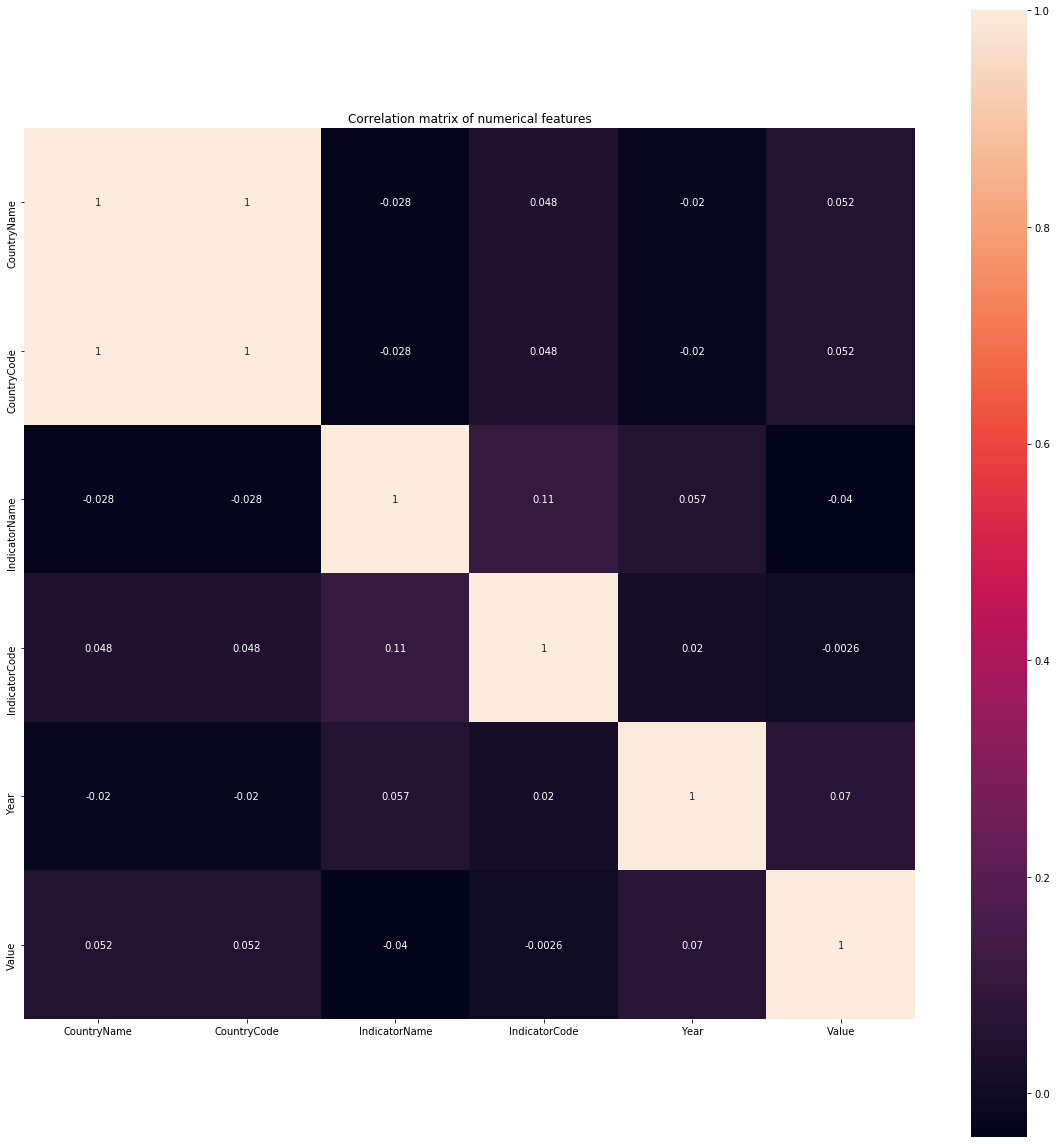

In [47]:
corr = data.corr() #perform correlation between all continous features
plt.subplots(figsize=(16,16));
sns.heatmap(corr, annot=True, square=True) #plotting heatmap of correlations
plt.title("Correlation matrix of numerical features")
plt.tight_layout()
plt.show()

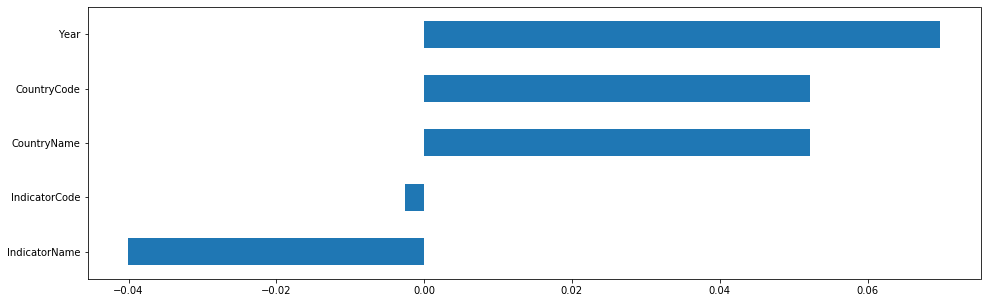

In [48]:
plt.figure(figsize=(16,5))
corr["Value"].sort_values(ascending=True)[:-1].plot(kind="barh")

In [49]:
data.head()

CountryName  CountryCode  IndicatorName  IndicatorCode  Year         Value
0            0            0             40           1181  1960  1.335609e+02
1            0            0             44           1204  1960  8.779760e+01
2            0            0             45           1205  1960  6.634579e+00
3            0            0             46           1206  1960  8.102333e+01
4            0            0             86            636  1960  3.000000e+06

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117472 entries, 0 to 5655835
Data columns (total 6 columns):
CountryName      117472 non-null int32
CountryCode      117472 non-null int32
IndicatorName    117472 non-null int32
IndicatorCode    117472 non-null int32
Year             117472 non-null int64
Value            117472 non-null float64
dtypes: float64(1), int32(4), int64(1)
memory usage: 4.5 MB


In [51]:
x = data.drop(['Value','IndicatorCode'],axis=1) #independet features
x=pd.DataFrame(x)
y = data['Value'] #dependent feature
y=pd.DataFrame(y)

In [52]:
x.head()

CountryName  CountryCode  IndicatorName  Year
0            0            0             40  1960
1            0            0             44  1960
2            0            0             45  1960
3            0            0             46  1960
4            0            0             86  1960

In [53]:
y.head()

Value
0  1.335609e+02
1  8.779760e+01
2  6.634579e+00
3  8.102333e+01
4  3.000000e+06

In [54]:
data.head()

CountryName  CountryCode  IndicatorName  IndicatorCode  Year         Value
0            0            0             40           1181  1960  1.335609e+02
1            0            0             44           1204  1960  8.779760e+01
2            0            0             45           1205  1960  6.634579e+00
3            0            0             46           1206  1960  8.102333e+01
4            0            0             86            636  1960  3.000000e+06

In [55]:
type(x)

pandas.core.frame.DataFrame

In [56]:
type(y)

pandas.core.frame.DataFrame

In [57]:
data['CountryCode'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [58]:
data.shape

(117472, 6)

In [59]:
data["CountryCode"].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [60]:
data['CountryName'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [61]:
x=x.values

In [62]:
y=y.values

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# BULIDING MODEL

# RandomForestRegressor

In [64]:

from sklearn.ensemble import RandomForestRegressor

In [65]:

rand=RandomForestRegressor(n_estimators=10,random_state=52)
rand.fit(x_train,y_train)


C:\Users\harin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=52, verbose=0,
                      warm_start=False)

In [66]:
x_test

array([[   3,    3,  602, 1965],
       [   0,    0,  775, 1994],
       [   2,    2,  843, 2011],
       ...,
       [   4,    4,   40, 1987],
       [   0,    0,  854, 1971],
       [   1,    1,  236, 1990]], dtype=int64)

In [67]:
from collections import Counter as c
c(data["CountryCode"])


Counter({0: 17115, 1: 17611, 2: 35721, 3: 22600, 4: 24425})

In [68]:
c(data["CountryName"])


Counter({0: 17115, 1: 17611, 2: 35721, 3: 22600, 4: 24425})

In [69]:
ypred=rand.predict(x_test)
print(ypred)

[ 1.00908614e+00 -4.48699295e+06  3.37120000e+11 ...  5.29631400e+01
  7.60706000e+08  4.17116869e+01]


In [70]:
y_test

array([[1.30605650e+00],
       [6.98730552e+00],
       [2.66711608e-01],
       ...,
       [5.32790000e+01],
       [7.30710000e+08],
       [5.11174508e+01]])

In [89]:
from sklearn.metrics import r2_score
r2_score(y_test,ypred)

0.9730160900254373

# Multi linear Regression

In [81]:
mr=LinearRegression()
mr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
y_linpred=mr.predict(x_test)

In [87]:
r2_score(y_test,y_linpred)

0.009182625238825959

In [84]:
data.head()

CountryName  CountryCode  IndicatorName  IndicatorCode  Year         Value
0            0            0             40           1181  1960  1.335609e+02
1            0            0             44           1204  1960  8.779760e+01
2            0            0             45           1205  1960  6.634579e+00
3            0            0             46           1206  1960  8.102333e+01
4            0            0             86            636  1960  3.000000e+06

In [85]:
import pickle
pickle.dump(rand,open("co2.pickle","wb"))

# DecisionTreeRegressor

In [90]:
from sklearn.tree import DecisionTreeRegressor

In [91]:
dt=DecisionTreeRegressor(random_state=0)

In [92]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [93]:
y_dtpred=dt.predict(x_test)


In [94]:
r2_score(y_test,y_dtpred)

0.9899265906751206

In [95]:
import pickle
pickle.dump(dt,open("co2.pickle","wb"))